In [1]:
import numpy as np

import torch as th
print("Using pytorch {}".format(th.__version__))

import pandas as pd
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset



Using pytorch 2.1.1


In [2]:
set_pretty_prints()

In [3]:
df = load_dataset('imobiliare.ro')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]

In [6]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

## Exploration

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

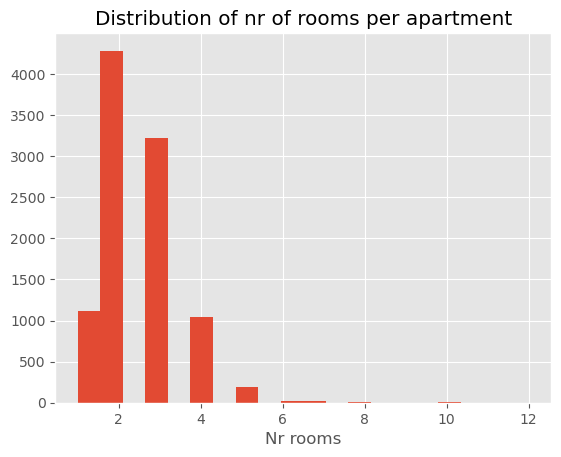

In [8]:
field = 'nr cam'
x_label = 'Nr rooms'
title = 'Distribution of nr of rooms per apartment'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 1.0, 'Distribution of sqm per property')

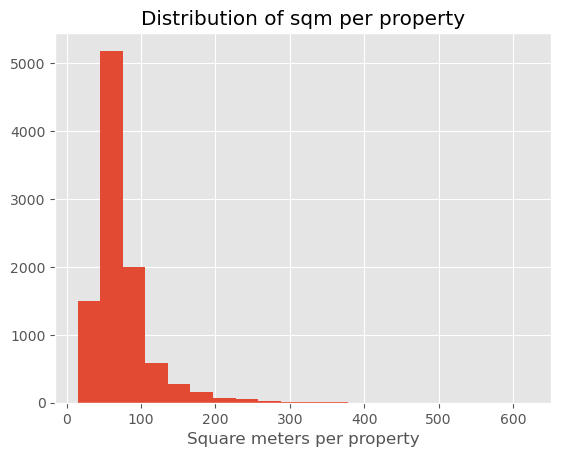

In [9]:
# TODO: Analyse a few more features
field = 'mp'
x_label = 'Square meters per property'
title = 'Distribution of sqm per property'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 0, 'Price')

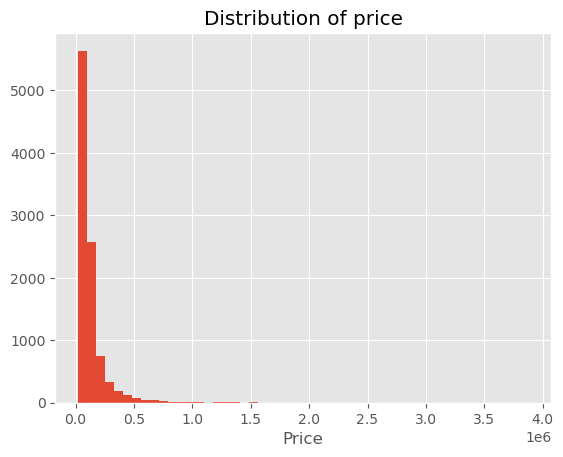

In [10]:
# TODO: Analyse target distribution
target = y_price
title = 'Distribution of price'
x_label = 'Price'
plt.hist(target, bins=50)
plt.title(title)
plt.xlabel(x_label)

Text(0.5, 0, 'Price')

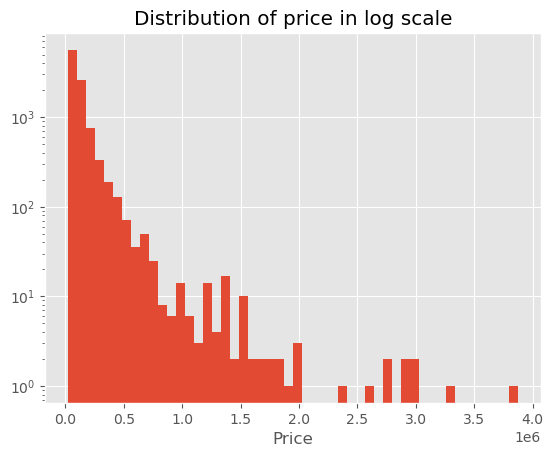

In [11]:
# TODO: Re-display the target distribution
target = y_price
title = "Distribution of price in log scale"
x_label = "Price"
plot_param = 'log'
plot_param_value = True
kwargs = {plot_param : plot_param_value}
plt.hist(target, bins=50, **kwargs)
plt.title(title)
plt.xlabel(x_label)

In [12]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [13]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [14]:
df_new = df[new_corr_features]

In [15]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Modelling
- further process X data maybe
- construct normal eq and determine model coefs `(((XtX)^-1)Xt)y (y = x*w => w = y/x)`
- validate results (how, when)

`f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N-1]*w[N-1] +X[N]*w[N] | X[N] == 1`

In [16]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [17]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [18]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [19]:
X.max()[:10]

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [20]:
np_X = X.values

In [21]:
np_X[:20]

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [22]:
np_X.mean(axis=0)

array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [23]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [24]:
np_X_n[:20]

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

In [25]:
np_y = y_price.values
np_y[:20]

array([  35800,   35800,   39600,   29800,  112900,   37400,   39500, 2350000,  332000,   39900,   39500,   42766,   88253,   26800,   93000,  135000,  115000,   39500,   55192,   69900])

In [26]:
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n[:20]

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.6 , 0.08, 0.01, 0.01, 0.01, 0.02, 0.  , 0.02, 0.03, 0.03, 0.01, 0.01, 0.01])

In [27]:
np_y.min()


18000

In [28]:
np_y.max()

3880000

In [29]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()
y_test = np_y_n * y_norm_div + y_norm_sub
y_test[:20]

array([  35800.,   35800.,   39600.,   29800.,  112900.,   37400.,   39500., 2350000.,  332000.,   39900.,   39500.,   42766.,   88253.,   26800.,   93000.,  135000.,  115000.,   39500.,   55192.,   69900.])

In [30]:
# TODO: write normal eq for raw data
np_weights = np.linalg.pinv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y)

# TODO: write normal eq for normalized data
np_weights_n = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)


In [31]:
np_weights

array([-35253.17,   4068.76, -77652.97, -77536.51, -76809.97,   2762.81, -18637.49,   7934.74])

In [32]:
np_weights_n

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ])

In [33]:
#TODO: calc predictions for raw data model
np_y_preds = np_X.dot(np_weights)

#TODO: calc predictions for normalized data model
np_y_preds_n = np_X_n.dot(np_weights_n)

In [34]:
np_y_preds[:20]

array([  74630.73,   97336.97,  119387.11,   77333.79,  179577.32,  111249.59,   40195.26, 1087562.99,  261327.85,  127124.26,   37432.45,   51429.28,  141453.02,   -1546.01,  116132.1 ,  171701.58,  204724.82,   74630.73,  149873.29,   84551.27])

Text(0.5, 1.0, 'Normed data model predictions')

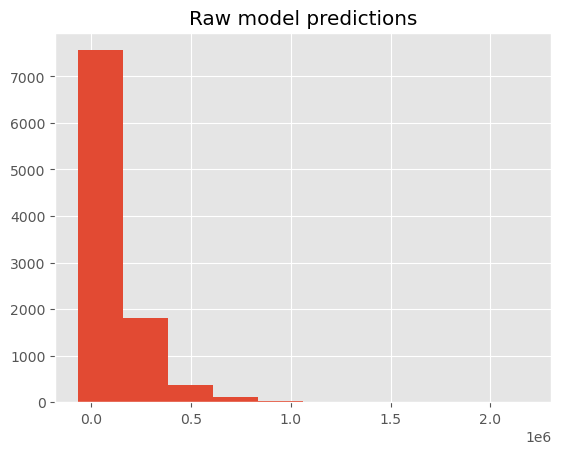

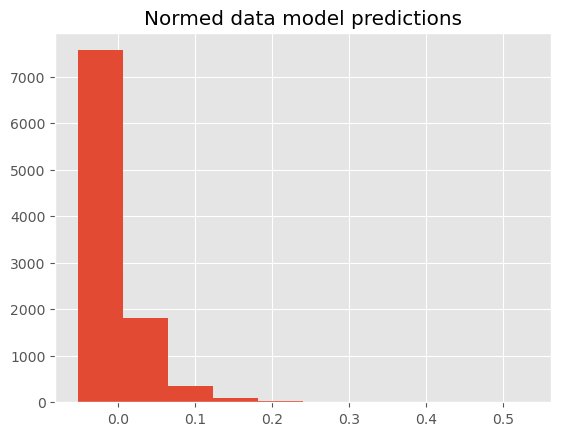

In [35]:
plt.figure()
plt.hist(np_y_preds)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_preds_n)
plt.title('Normed data model predictions')

### One more model before testing results

Lets further improve model by adding bias

In [36]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones[:20]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [37]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb[:20]

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83,  1.  ],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83,  1.  ],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83,  1.  ],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83,  1.  ],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83, 

In [38]:
# TODO: calculate weights
np_weights_nb = np.linalg.inv(np_X_nb.T.dot(np_X_nb) + 0.02 * np.eye(np_X_nb.shape[1])).dot(np_X_nb.T).dot(np_y_n)
np_weights_nb

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [39]:
# TODO: calculate predictions
np_y_preds_nb = np_X_nb.dot(np_weights_nb)
np_y_preds_nb[:20]

array([ 0.01,  0.02,  0.03,  0.02,  0.04,  0.02,  0.01,  0.28,  0.06,  0.03,  0.01,  0.01,  0.03, -0.01,  0.03,  0.04,  0.05,  0.01,  0.03,  0.02])

(array([  21.,  628., 2177., 3021., 1719.,  772.,  433.,  269.,  199.,  143.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,   15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,    2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,    0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.11,  0.12,  0.13,  0.14,  0.15,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.52,  0.53,  0.54,  0.55,  0.56]),
 <BarContainer object of 50 artists>)

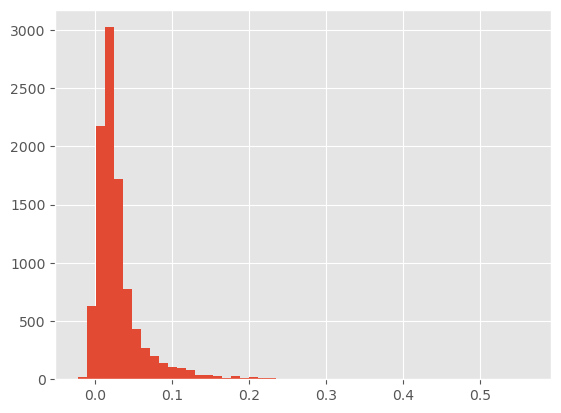

In [40]:
plt.hist(np_y_preds_nb, bins=50)

In [41]:
np_y_pred_price = np_y_preds
np_y_pred_n_price = np_y_preds_n * y_norm_div + y_norm_sub
np_y_pred_nb_price = np_y_preds_nb  * y_norm_div + y_norm_sub

### Now lets prepare some friendly calitative analysis outputs

Raw model

In [42]:
df_result_raw = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_price.round(0),
    }
)
df_result_raw.head(10)
df_result_raw.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


Normed data model

In [43]:
df_result_n = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_n_price.round(0),
    }
)
df_result_n.head(10)
df_result_n.tail(10)

,GOLD,PRED
9887,47000,-73848.0
9888,34500,-145384.0
9889,56000,-88624.0
9890,101000,22805.0
9891,79524,-28054.0
9892,85000,53543.0
9893,134999,49815.0
9894,59000,-57890.0
9895,110000,3841.0
9896,61500,-86233.0


Normed & bias added

In [44]:

df_result_nb = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
    }
)
df_result_nb.head(10)
df_result_nb.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139730.0
9891,79524,88871.0
9892,85000,170469.0
9893,134999,166740.0
9894,59000,59035.0
9895,110000,120767.0
9896,61500,30692.0


Now lets see some quantitative analysis of the results

In [45]:
# TODO: complete code below
abs_err = np.abs(y_price - np_y_pred_nb_price)
abs_err

0       38830.583012
1       61536.616239
2       79786.689664
3       47532.935938
4       66677.306676
            ...     
9892    85468.921492
9893    31741.189064
9894       35.241696
9895    10767.070958
9896    30808.428333
Name: Price, Length: 9897, dtype: float64

In [46]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [47]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74631.0,108.47
1,35800,97337.0,171.89
2,39600,119387.0,201.48
3,29800,77333.0,159.51
4,112900,179577.0,59.06
5,37400,111249.0,197.46
6,39500,40195.0,1.76
7,2350000,1087560.0,53.72
8,332000,261327.0,21.29
9,39900,127124.0,218.61


In [48]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59587.0,5.42
9878,32900,37951.0,15.35
9879,53490,49445.0,7.56
9880,79000,65299.0,17.34
9881,79900,110933.0,38.84
9882,149000,103314.0,30.66
9883,143000,154443.0,8.00
9884,55000,72155.0,31.19
9885,62860,67189.0,6.89
9886,27500,4096.0,85.11


In [49]:
proc_err.mean()

40.56801916791146

In [50]:
def train_neq(inputs, gold):
    # TODO:
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true *100
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall))
    return overall

In [51]:
# Note that Web Page format includes the area name.
df['Location'] = df['WebPage'].apply(lambda getloc : getloc.split('/')[5])
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage,Location
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1,rahova
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1,rahova
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1,rahova
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1,rahova
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1,p-ta-presei-libere
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1,crangasi
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1,central
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1,apusului
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1,theodor-pallady


In [52]:
len(df.Location.unique())

190

In [53]:
df_locs= pd.get_dummies(df.Location, prefix='loc', columns=['Location'], dtype=float)
np_locs = df_locs.values

np_X_loc_n = np.concatenate((np_X_n, np_locs), axis=1)
np_X_loc_nb = np.concatenate((np_X_loc_n, ones), axis=1)
df_locs.head(10)

,loc_1-decembrie-1918,loc_1-mai,loc_13-septembrie,loc_16-februarie,loc_agronomie,loc_alba-iulia,loc_alexandriei,loc_alexandru-obregia,loc_andronache,loc_antiaeriana,loc_aparatorii-patriei,loc_apusului,loc_arcul-de-triumf,loc_armeneasca,loc_aviatiei,loc_aviatorilor,loc_baba-novac,loc_baicului,loc_balta-alba,loc_baneasa,loc_banu-manta,loc_barbu-vacarescu,loc_basarab,loc_basarabia,loc_batistei,loc_bd-gloriei,loc_beller,loc_berceni,loc_brancoveanu,loc_bucur-obor,loc_bucurestii-noi,loc_calea-calarasilor,loc_calea-plevnei,loc_calea-victoriei,loc_camil-ressu,loc_campia-libertatii,loc_cantemir,loc_capitale,loc_casin,loc_central,loc_centrul-civic,loc_centrul-istoric,loc_chibrit,loc_chisinau,loc_chitila,loc_cismigiu,loc_clabucet,loc_clucerului,loc_colentina,loc_compozitorilor,loc_constructorilor,loc_cosbuc,loc_costin-georgian,loc_cotroceni,loc_crangasi,loc_dacia,loc_damaroaia,loc_decebal,loc_doamna-ghica,loc_domenii,loc_dorobanti,loc_dristor,loc_drumul-gazarului,loc_drumul-sarii,loc_drumul-taberei,loc_dudesti,loc_eminescu,loc_eroii-revolutiei,loc_ferdinand,loc_ferentari,loc_fizicienilor,loc_floreasca,loc_foisorul-de-foc,loc_fundeni,loc_gara-de-nord,loc_ghencea,loc_giulesti,loc_giurgiului,loc_gorjului,loc_gradina-icoanei,loc_grivita,loc_grozavesti,loc_herastrau,loc_iancu-nicolae,loc_iancului,loc_jiului,loc_kiseleff,loc_kogalniceanu,loc_lacul-morii,loc_lacul-tei,loc_lahovari,loc_libertatii,loc_liviu-rebreanu,loc_lucretiu-patrascanu,loc_lujerului,loc_macaralei,loc_magheru,loc_marasesti,loc_margeanului,loc_matei-voievod,loc_metalurgiei,loc_mihai-bravu,loc_militari,loc_morarilor,loc_mosilor,loc_muncii,loc_natiunile-unite,loc_nerva-traian,loc_nicolae-grigorescu,loc_nord,loc_nordului,loc_obor,loc_octavian-goga,loc_oltenitei,loc_ozana,loc_p-ta-alba-iulia,loc_p-ta-amzei,loc_p-ta-dorobanti,loc_p-ta-gorjului,loc_p-ta-muncii,loc_p-ta-presei-libere,loc_p-ta-resita,loc_p-ta-romana,loc_p-ta-rosetti,loc_p-ta-sfanta-vineri,loc_p-ta-unirii,loc_p-ta-universitatii,loc_p-ta-victoriei,loc_pache-protopopescu,loc_pacii,loc_pajura,loc_panduri,loc_pantelimon,loc_parcul-carol,loc_parcul-circului,loc_pipera,loc_plevnei,loc_politehnica,loc_polona,loc_prelungirea-ghencea,loc_primaverii,loc_progresul,loc_rahova,loc_regie,loc_regina-elisabeta,loc_romana,loc_rosetti,loc_sala-palatului,loc_salaj,loc_salajan,loc_sebastian,loc_serban-voda,loc_sisesti,loc_socului,loc_soseaua-nordului,loc_splaiul-independentei,loc_splaiul-unirii,loc_stefan-cel-mare,loc_stirbei-voda,loc_straulesti,loc_sud,loc_sud-est,loc_tei,loc_teiul-doamnei,loc_televiziune,loc_theodor-pallady,loc_timisoara,loc_timpuri-noi,loc_tineretului,loc_titan,loc_titulescu,loc_trafic-greu,loc_turda,loc_ultracentral,loc_unirii,loc_universitate,loc_uverturii,loc_vacaresti,loc_valea-ialomitei,loc_valea-oltului,loc_vatra-luminoasa,loc_veteranilor,loc_victoriei,loc_viilor,loc_virtutii,loc_vitan,loc_vitan-barzesti,loc_vitan-mall,loc_vitanul-nou,loc_zetarilor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [55]:
np_X_loc_nb.shape

(9897, 199)

In [59]:
print('No location data {}:\n{}'.format(np_X_nb.shape, np_X_nb[:5]))
print('\n\nWith location data {}:\n{}'.format(np_X_loc_nb.shape, np_X_loc_nb[:5, :20]))

No location data (9897, 9):
[[-0.53 -0.44 -0.38  1.33 -1.03 -0.47  0.63  0.83  1.  ]
 [-0.53 -0.42 -0.38  1.33 -1.03 -0.47 -1.59  0.83  1.  ]
 [-0.53 -0.17 -0.38  1.33 -1.03 -0.47  0.63  0.83  1.  ]
 [-1.58 -0.64 -0.38  1.33 -1.03 -0.47  0.63  0.83  1.  ]
 [ 0.52  0.4  -0.38 -0.75  0.98 -0.12  0.63  0.83  1.  ]]


With location data (9897, 199):
[[-0.53 -0.44 -0.38  1.33 -1.03 -0.47  0.63  0.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.53 -0.42 -0.38  1.33 -1.03 -0.47 -1.59  0.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.53 -0.17 -0.38  1.33 -1.03 -0.47  0.63  0.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.58 -0.64 -0.38  1.33 -1.03 -0.47  0.63  0.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.52  0.4  -0.38 -0.75  0.98 -0.12  0.63  0.83  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


## Lets see some correlations !

In [60]:
df_locs['Price'] = df.Price
df_locs.corr().iloc[-10:,-10:]

,loc_veteranilor,loc_victoriei,loc_viilor,loc_virtutii,loc_vitan,loc_vitan-barzesti,loc_vitan-mall,loc_vitanul-nou,loc_zetarilor,Price
loc_veteranilor,1.000000,-0.000797,-0.000143,-0.000771,-0.001156,-0.000624,-0.001209,-0.000202,-0.000143,-0.006399
loc_victoriei,-0.000797,1.000000,-0.000563,-0.003039,-0.004558,-0.002458,-0.004765,-0.000797,-0.000563,0.031740
loc_viilor,-0.000143,-0.000563,1.000000,-0.000545,-0.000817,-0.000441,-0.000854,-0.000143,-0.000101,-0.002284
loc_virtutii,-0.000771,-0.003039,-0.000545,1.000000,-0.004408,-0.002378,-0.004608,-0.000771,-0.000545,-0.015010
loc_vitan,-0.001156,-0.004558,-0.000817,-0.004408,1.000000,-0.003566,-0.006912,-0.001156,-0.000817,-0.014701
loc_vitan-barzesti,-0.000624,-0.002458,-0.000441,-0.002378,-0.003566,1.000000,-0.003728,-0.000624,-0.000441,-0.004944
loc_vitan-mall,-0.001209,-0.004765,-0.000854,-0.004608,-0.006912,-0.003728,1.000000,-0.001209,-0.000854,-0.011927
loc_vitanul-nou,-0.000202,-0.000797,-0.000143,-0.000771,-0.001156,-0.000624,-0.001209,1.000000,-0.000143,0.000397
loc_zetarilor,-0.000143,-0.000563,-0.000101,-0.000545,-0.000817,-0.000441,-0.000854,-0.000143,1.000000,-0.004341
Price,-0.006399,0.031740,-0.002284,-0.015010,-0.014701,-0.004944,-0.011927,0.000397,-0.004341,1.000000


### Now we can train the model with location data.

In [61]:
np_weights_loc_nb = train_neq(np_X_loc_nb, np_y_n)
np_weights_loc_nb[:10]

array([-0.01,  0.03,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.01,  0.01])

In [62]:
evaluate(
    theta=np_weights_loc_nb,
    inputs=np_X_loc_nb,
    gold=np_y_n,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
         GOLD       PRED    ERR%
0     35800.0    60149.0   68.01
1     35800.0    75595.0  111.16
2     39600.0    96062.0  142.58
3     29800.0    60737.0  103.82
4    112900.0   165458.0   46.55
5     37400.0    96045.0  156.80
6     39500.0    40132.0    1.60
7   2350000.0  1059221.0   54.93
8    332000.0   272196.0   18.01
9     39900.0   104683.0  162.36
10    39500.0    36589.0    7.37
11    42766.0    46396.0    8.49
12    88253.0   121638.0   37.83
13    26800.0     3888.0   85.49
14    93000.0    79927.0   14.06
15   135000.0   147780.0    9.47
16   115000.0   170047.0   47.87
17    39500.0    60149.0   52.28
18    55192.0   132906.0  140.81
19    69900.0    51052.0   26.96
          GOLD      PRED   ERR%
9877   63000.0   35236.0  44.07
9878   32900.0   22089.0  32.86
9879   53490.0   29848.0  44.20
9880   79000.0   46440.0  41.22
9881   79900.0   82165.0   2.84
9882  149000.0  179914.0  20.75
9883  143000.0  133547.0   6.61
9884   55000.0   52369.0   4.78
9

33.73830087902329

In [63]:
print("The previous normalize-data with bias model error was: {:.2f}%".format(proc_err.mean()))

The previous normalize-data with bias model error was: 40.57%


# Now for a more correct and real-life approach
We will not use the pre-processed data and perform a train-test split. There is no need for train-dev-test split as we do not have a training process to use the dev on.

In [64]:
from sklearn.model_selection import train_test_split

np_x_loc_trn, np_x_loc_tst, np_y_trn, np_y_tst = train_test_split(np_X_loc_nb, np_y_n, test_size=0.2)
# but is this enough ... ?


## Lets do the custom split "dance"

In [65]:
def train_test_split_idx(data_size, test_size):
  test_len = int(data_size * test_size)
  all_idx = np.arange(data_size)
  np.random.shuffle(all_idx)
  test_idx = all_idx[:test_len]
  train_idx = all_idx[test_len:]
  return train_idx, test_idx

In [66]:
train_idx, test_idx = train_test_split_idx(np_X_loc_nb.shape[0], test_size=0.2)
print(train_idx.shape, test_idx.shape)

(7918,) (1979,)


In [67]:
lst_experiments =[
  {
    "train" : np_X[train_idx],
    "test" : np_X[test_idx],
    "name" : "Normal"
  },
  {
    "train" : np_X_n[train_idx],
    "test" : np_X_n[test_idx],
    "name" : "Normalized",
  },
  {
    "train" : np_X_nb[train_idx],
    "test" : np_X_nb[test_idx],
    "name" : "Normalized + Bias",
  },
  {
    "train" : np_X_loc_nb[train_idx],
    "test" : np_X_loc_nb[test_idx],
    "name" : "Normalized + Bias + Location",
  }
]

dct_results = {
  'Experiment' : [],
  'Train Score' : [],
  'Test Score' : []
}

for dct_experiment in lst_experiments:
  experiment_name = dct_experiment["name"]
  print("Running experiment {}".format(experiment_name), flush=True)
  np_x_train = dct_experiment["train"]
  np_x_test = dct_experiment["test"]
  np_y_train = np_y_n[train_idx]
  np_y_test = np_y_n[test_idx]
  np_theta = train_neq(np_x_train, np_y_train)
  train_score = evaluate(
      theta=np_theta,
      inputs=np_x_train,
      gold=np_y_train,
      y_div=y_norm_div,
      y_sub=y_norm_sub,
      name='TRAIN {}'.format(dct_experiment["name"]),
  )
  test_score = evaluate(
      theta=np_theta,
      inputs=np_x_test,
      gold=np_y_test,
      y_div=y_norm_div,
      y_sub=y_norm_sub,
      name='TEST {}'.format(dct_experiment["name"]),
  )
  dct_results["Train Score"].append(train_score)
  dct_results["Test Score"].append(test_score)
  dct_results["Experiment"].append(experiment_name)

df_result = pd.DataFrame(dct_results).sort_values(by="Test Score")
print(df_result)

# now lets serialize the results
df_result.to_csv('outputs/results.csv', index=False)

Running experiment Normal
Results for TRAIN Normal
        GOLD      PRED   ERR%
0    39500.0   36107.0   8.59
1    84000.0   88341.0   5.17
2   230000.0  352227.0  53.14
3   105000.0  106616.0   1.54
4    88900.0   75660.0  14.89
5    93000.0  126917.0  36.47
6   599900.0  432595.0  27.89
7   147000.0  115182.0  21.64
8    55000.0   20257.0  63.17
9    82900.0   49341.0  40.48
10   71000.0  101116.0  42.42
11  140000.0  132484.0   5.37
12  475000.0  309529.0  34.84
13   59000.0   64307.0   8.99
14   34500.0   18697.0  45.81
15   65900.0  103520.0  57.09
16  157000.0   79231.0  49.53
17  300000.0  343767.0  14.59
18   45000.0   52640.0  16.98
19   66500.0   77957.0  17.23
          GOLD      PRED    ERR%
7898   85550.0  113431.0   32.59
7899  165000.0   97539.0   40.89
7900   82300.0   86501.0    5.10
7901   72200.0   84676.0   17.28
7902   59000.0   81055.0   37.38
7903  498000.0  407976.0   18.08
7904  239000.0  246009.0    2.93
7905   84000.0  112860.0   34.36
7906   63600.0  130534

In [68]:
df_result

,Experiment,Train Score,Test Score
3,Normalized + Bias + Location,33.453926,33.673640
0,Normal,40.450719,40.137229
2,Normalized + Bias,40.450719,40.137229
1,Normalized,139.075211,141.128480


# Simple Neural model


In [69]:
import torch as th

# A*B*C*D*E*F*G*H*I*J*K*L*M*N*O*P*Q*R*S*T*U*V*W*X*Y*Z === A*X 

class SimpleLinerRealEstateModel(th.nn.Module):
    # Parameters:
    # n_feats - number of input features
    # n_hid1 - number of output features in the first hidden layers
    def __init__(self, n_feats, n_hid1=32):
        super().__init__()
        self.n_feats = n_feats
        self.hidden1 = th.nn.Linear(n_feats, n_hid1)
        self.act1 = th.nn.ReLU()
        self.readout = th.nn.Linear(n_hid1, 1)
        return
    
    def forward(self, inputs):
        #############################
        # TODO: complete forward pass 
        #############################
        th_x = inputs
        th_x = self.hidden1(th_x)
        th_x = self.act1(th_x)
        th_out = self.readout(th_x)
        return th_out

In [70]:
model = SimpleLinerRealEstateModel(198, 256)
model

SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=198, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)

In [72]:
assert len(np.unique(np_X_loc_nb[:,-1])) ==  1
np.unique(np_X_loc_nb[:,-1])
np_x_train = np_X_loc_nb[train_idx, :-1]
np_x_test_full = np_X_loc_nb[test_idx, :-1]
print(np_x_train.shape, np_x_test_full.shape)

(7918, 198) (1979, 198)


### Introducing "dev" dataset
Now we will have a training process so we need a dev dataset

In [73]:
DEV_PRC = 0.5
DEV_SIZE = int(np_x_test_full.shape[0] * DEV_PRC)
np_x_dev = np_x_test_full[:DEV_SIZE,:]
np_x_test = np_x_test_full[DEV_SIZE:,:]
print(np_x_dev.shape, np_x_test.shape)

(989, 198) (990, 198)


Now we tensorize but we eliminate the bias term 

In [74]:
th_x_trn = th.tensor(np_x_train, dtype=th.float32)
th_x_dev = th.tensor(np_x_dev, dtype=th.float32)
th_x_test = th.tensor(np_x_test, dtype=th.float32)
print(th_x_trn.shape, th_x_dev.shape, th_x_test.shape)
th_x_trn[:10]

torch.Size([7918, 198]) torch.Size([989, 198]) torch.Size([990, 198])


tensor([[-0.5321, -0.6896, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201, -0.2914, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201,  1.5258,  2.6374,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 2.6244,  0.4554, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.7892, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.5901, -0.3792,  ...,  0.0000,  0.0000,  0.0000]])

In [75]:
th.cuda.get_device_name()

'Quadro RTX 3000'

In [76]:
th_x_train_slice_gpu = th_x_trn[:10].to(th.device('cuda'))
th_x_train_slice_gpu

tensor([[-0.5321, -0.6896, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201, -0.2914, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201,  1.5258,  2.6374,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 2.6244,  0.4554, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.7892, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.5901, -0.3792,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')

In [77]:
np_y_n.shape

(9897,)

In [78]:
np_y_trn = np_y_n[train_idx]
np_y_tst = np_y_n[test_idx]
# split in dev-test
np_y_dev = np_y_tst[:DEV_SIZE].reshape(-1,1)
np_y_test = np_y_tst[DEV_SIZE:].reshape(-1,1)

np_y_trn = np_y_trn.reshape(-1,1)
np_y_trn[:10]

array([[0.01],
       [0.02],
       [0.05],
       [0.02],
       [0.02],
       [0.02],
       [0.15],
       [0.03],
       [0.01],
       [0.02]])

In [79]:
#############################
# TODO: complete y tensors creation 
#############################
th_y_trn = th.tensor(np_y_trn, dtype=th.float32)
th_y_dev = th.tensor(np_y_dev, dtype=th.float32)
th_y_test = th.tensor(np_y_test, dtype=th.float32)
th_y_trn[:20]

tensor([[0.0056],
        [0.0171],
        [0.0549],
        [0.0225],
        [0.0184],
        [0.0194],
        [0.1507],
        [0.0334],
        [0.0096],
        [0.0168],
        [0.0137],
        [0.0316],
        [0.1183],
        [0.0106],
        [0.0043],
        [0.0124],
        [0.0360],
        [0.0730],
        [0.0070],
        [0.0126]])

In [80]:
print(th_y_dev.shape)
print(th_x_dev.shape)
print(th_y_test.shape)
print(th_x_test.shape)
print(th_y_trn.shape)
print(th_x_trn.shape)

torch.Size([989, 1])
torch.Size([989, 198])
torch.Size([990, 1])
torch.Size([990, 198])
torch.Size([7918, 1])
torch.Size([7918, 198])


### Model training data feed
Now lets prepare the internal mechanics for data feeding in the model training process

In [81]:
BATCH_SIZE = 16
th_ds = th.utils.data.TensorDataset(th_x_trn, th_y_trn)
th_dl = th.utils.data.DataLoader(th_ds, batch_size=BATCH_SIZE)
th_x_trn.shape

torch.Size([7918, 198])

In [82]:
for th_x_batch, th_y_batch in th_dl:
    break
print(th_x_batch.shape, th_y_batch.shape)
th_x_batch

torch.Size([16, 198]) torch.Size([16, 1])


tensor([[-0.5321, -0.6896, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201, -0.2914, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5201,  1.5258,  2.6374,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.5321, -0.6399, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.8888, -0.3792,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5321, -0.2665, -0.3792,  ...,  0.0000,  0.0000,  0.0000]])

Re-writing evaluation function

In [83]:

def th_evaluate(m, th_inputs, gold, y_div, y_sub, name="", verbose=False):
  m.eval()
  with th.no_grad():
    #############################
    # TODO: complete yhat generation 
    #############################            
    _y_pred = m(th_inputs)
      
  _y_vals = _y_pred * y_div + y_sub
  
  _y_true = gold * y_div + y_sub
  
  res_err = th.abs(_y_true - _y_vals)
  prc_err = res_err / _y_true * 100
  
  overall = prc_err.mean()
  if verbose:
      df_result = pd.DataFrame(
          {
          'GOLD' : _y_true.cpu().numpy().ravel(),
          'PRED' : _y_vals.cpu().numpy().ravel().round(0),
          'ERR%' : prc_err.cpu().numpy().ravel().round(2)
          }
      )
      print('Results for', name)
      print(df_result.head(20))
      print(df_result.tail(20))    
  m.train()
  return overall

In [84]:
loss_func = th.nn.MSELoss()
# optimizer: weights = weights - alpha * grads # alpha << 1
opt = th.optim.Adam(model.parameters(), lr=5e-5)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 5e-05
    maximize: False
    weight_decay: 0
)

In [85]:
DEBUG = False
TOTAL_NR_EPOCHS = 100
# re-init model
model = SimpleLinerRealEstateModel(th_x_trn.shape[1], 256)
print(model)
opt = th.optim.Adam(model.parameters(), lr=1e-4)
best_dev_err = 10_000
wait_time = 0
max_nr_of_succesive_fails = 5
for epoch in range(TOTAL_NR_EPOCHS):
  if DEBUG and epoch >0:
      break
  for th_x_batch, th_y_batch in th_dl:
    # compute current inferred values with forward prop
    th_y_hat = model(th_x_batch)
    # compute loss (compare results with actual truth)
    th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
    # nullfy the gradients
    opt.zero_grad()
    # compute loss 1st derv wrt all model weights (grads)
    th_loss.backward()
    
    if DEBUG:
        th_param = next(model.parameters())
        print(th_param.grad)
        break
    
    # apply gradients to weights with a hopefully smart approach
    opt.step()
  #end current epoch
  if not DEBUG:
    # now we evaluate on TRAIN and DEV to see how good we are
    train_err = th_evaluate(
        m=model,
        th_inputs=th_x_trn,
        gold=th_y_trn,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='TRAIN @ Epoch {}'.format(epoch)
    )
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=th_y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='DEV @ Epoch {}'.format(epoch)
    )
    if best_dev_err > dev_err:
        best_dev_err = dev_err
        wait_time = 0
        print("BEST MODEL @ Epoch {} - train err: {:.2f}%, dev err: {:.2f}% ".format(epoch, train_err, dev_err), flush=True)
    else:
        wait_time += 1
        if wait_time > max_nr_of_succesive_fails:
            print(f"Stopped training at epoch {epoch} !")
            break

if not DEBUG: 
  # finally we evaluate on TEST
  th_evaluate(
    m=model,
    th_inputs=th_x_test,
    gold=th_y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
  )


SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=198, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)
BEST MODEL @ Epoch 0 - train err: 38.10%, dev err: 40.49% 
BEST MODEL @ Epoch 1 - train err: 29.98%, dev err: 32.77% 
BEST MODEL @ Epoch 2 - train err: 26.59%, dev err: 29.96% 
BEST MODEL @ Epoch 3 - train err: 24.64%, dev err: 28.54% 
BEST MODEL @ Epoch 4 - train err: 23.51%, dev err: 27.75% 
BEST MODEL @ Epoch 5 - train err: 22.74%, dev err: 27.31% 
BEST MODEL @ Epoch 6 - train err: 22.28%, dev err: 27.21% 
BEST MODEL @ Epoch 7 - train err: 21.99%, dev err: 27.20% 
BEST MODEL @ Epoch 9 - train err: 21.32%, dev err: 27.18% 
BEST MODEL @ Epoch 14 - train err: 20.31%, dev err: 27.12% 
Stopped training at epoch 20 !
Results for Final TEST
        GOLD      PRED       ERR%
0   100600.0   95310.0   5.260000
1    75500.0   76667.0   1.550000
2   129000.0  125632.0   2.610000
3    95000.0   93505.0   1.570000
4   1062

In [86]:
best_dev_err

tensor(27.1219)

In [87]:
NUM_LOCATIONS = len(df.Location.unique())

In [88]:
t1 = th.arange(0, NUM_LOCATIONS, 1).view(1,-1).repeat(th_x_trn.shape[0], 1)[:10, :17]
t2 = th_x_trn[:10, 100:117]
print(t1.shape, t2.shape)
print(t1)
print(t2)
(t1 * t2).sum(-1).reshape(-1,1)

torch.Size([10, 17]) torch.Size([10, 17])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 

tensor([[10.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 2.],
        [ 0.]])

In [89]:
# Recompute data with locations IDs in order to move to location embeddings.
num_locations = df['Location'].nunique()

# Turn one hot location encoding into index encoding
def th_add_location_idx(th_x):
  # Use a mask of consecutive numbers in the one dimension
  mask = th.arange(0, num_locations, 1).view(1,-1).repeat(th_x.shape[0], 1)
  # Multiply with the one hot encoding to mask values not equal to our index
  mask = mask * th_x[:,8:]
  # Do a row sum to get the actual index.
  locs = th.sum(mask, 1).view(-1, 1)
  return th.cat((th_x[:,:8], locs), axis=1)

th_x_dev_embed = th_add_location_idx(th_x_dev)
th_x_trn_embed = th_add_location_idx(th_x_trn)
th_x_test_embed = th_add_location_idx(th_x_test)


In [90]:
th_x_dev_embed.shape

torch.Size([989, 9])

In [91]:
th_x_test_embed.shape

torch.Size([990, 9])

In [92]:
th_x_trn_embed.shape

torch.Size([7918, 9])

In [93]:
th_x_dev_embed[:20, -3:]

tensor([[  0.6273,   0.8281,  48.0000],
        [ -1.5940,  -1.2076,  64.0000],
        [  0.6273,  -1.2076, 102.0000],
        [  0.6273,   0.8281,  14.0000],
        [ -1.5940,   0.8281, 157.0000],
        [  0.6273,   0.8281,   0.0000],
        [  0.6273,   0.8281, 165.0000],
        [  0.6273,  -1.2076, 111.0000],
        [  0.6273,  -1.2076,  54.0000],
        [ -1.5940,  -1.2076, 104.0000],
        [ -1.5940,  -1.2076, 104.0000],
        [ -1.5940,   0.8281,  79.0000],
        [ -1.5940,  -1.2076, 101.0000],
        [  0.6273,  -1.2076, 149.0000],
        [  0.6273,   0.8281, 103.0000],
        [ -1.5940,  -1.2076,  64.0000],
        [ -1.5940,  -1.2076,  72.0000],
        [ -1.5940,  -1.2076, 175.0000],
        [  0.6273,   0.8281, 135.0000],
        [  0.6273,  -1.2076,  48.0000]])

In [94]:
th_ds = th.utils.data.TensorDataset(th_x_trn_embed, th_y_trn)
th_dl = th.utils.data.DataLoader(th_ds, batch_size=BATCH_SIZE)

for th_x_batch, th_y_batch in th_dl:
  break
print(th_x_batch.shape, th_y_batch.shape)
th_x_batch[:, -4:]

torch.Size([16, 9]) torch.Size([16, 1])


tensor([[ -0.1194,   0.6273,   0.8281, 102.0000],
        [  1.6545,  -1.5940,  -1.2076,  16.0000],
        [ -1.1837,   0.6273,  -1.2076,  45.0000],
        [  0.2354,   0.6273,  -1.2076,  19.0000],
        [  2.3641,   0.6273,   0.8281,  73.0000],
        [  2.0093,  -1.5940,  -1.2076,  10.0000],
        [  0.2354,   0.6273,   0.8281, 110.0000],
        [  1.2998,   0.6273,  -1.2076, 111.0000],
        [  0.9450,   0.6273,  -1.2076,  94.0000],
        [  0.2354,   0.6273,  -1.2076,  27.0000],
        [ -1.1837,  -1.5940,  -1.2076,  94.0000],
        [  0.2354,   0.6273,  -1.2076,  57.0000],
        [ -0.4742,   0.6273,   0.8281,  82.0000],
        [  0.9450,  -1.5940,  -1.2076,  77.0000],
        [ -0.4742,  -1.5940,   0.8281, 102.0000],
        [ -0.4742,   0.6273,   0.8281,  94.0000]])

In [95]:
N_INPUTS = 8 + 1 # 8 features + 1 location

In [96]:
class BasicEmbeddingsRealEstate(th.nn.Module):
  def __init__(self, embed_size=5, hsize=32, num_locations=NUM_LOCATIONS):
    super().__init__()
    self.embed_size = embed_size
    self.embed = th.nn.Embedding(num_embeddings=num_locations, embedding_dim=embed_size)
    self.hidden1 = th.nn.Linear((N_INPUTS -1 + embed_size), hsize)
    self.act1 = th.nn.ReLU()
    self.readout = th.nn.Linear(hsize, 1)
    return
  
  def forward(self, inputs):
    th_x_feat_input = inputs[:, :-1]
    th_x_embd_input = inputs[:, -1].long()
    th_embeds = self.embed(th_x_embd_input)
    th_x = th.cat((th_x_feat_input, th_embeds), axis=-1)
    th_x = self.hidden1(th_x)
    th_x = self.act1(th_x)
    th_out = self.readout(th_x)
    return th_out
  
  def get_embeds(self, inputs):
    th_x_embd_input = inputs[:, -1].long()
    th_embeds = self.embed(th_x_embd_input)
    return th_embeds

In [97]:
model2 = BasicEmbeddingsRealEstate(embed_size=5, hsize=32)
model2

BasicEmbeddingsRealEstate(
  (embed): Embedding(190, 5)
  (hidden1): Linear(in_features=13, out_features=32, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=32, out_features=1, bias=True)
)

In [98]:
th_x_batch.shape

torch.Size([16, 9])

In [99]:
model2.get_embeds(th_x_batch)

tensor([[ 0.2440, -0.9725, -1.6150, -0.8261,  1.0683],
        [ 1.0682, -0.9296, -0.9031, -0.6604,  0.4909],
        [ 0.2448, -0.5468, -2.1090, -0.1523, -1.8544],
        [ 0.4960,  0.7027, -0.4785, -0.4341,  1.4094],
        [-0.3509,  1.2650, -0.7091,  0.0299, -0.9996],
        [ 0.8757,  0.6529,  0.3300, -0.4394, -0.1538],
        [ 0.7465,  0.4458,  0.2529,  2.4524, -0.6143],
        [ 0.5475, -0.5485,  0.7301,  0.3571,  0.9300],
        [-1.6954, -1.5518, -0.7538, -0.2753,  1.0500],
        [-2.0845,  0.4147,  1.0051,  0.5205, -0.4662],
        [-1.6954, -1.5518, -0.7538, -0.2753,  1.0500],
        [ 0.0920,  1.0858,  0.2503, -0.8880,  1.3331],
        [ 0.3704,  1.7122,  0.3518,  0.1234,  0.8945],
        [ 0.8062,  1.3349,  0.2504,  1.0726,  2.5139],
        [ 0.2440, -0.9725, -1.6150, -0.8261,  1.0683],
        [-1.6954, -1.5518, -0.7538, -0.2753,  1.0500]],
       grad_fn=<EmbeddingBackward0>)

In [100]:
print("Initial model:\n{}\nModel Error: {}".format(model, dev_err))

Initial model:
SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=198, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)
Model Error: 27.376697540283203


In [101]:
embed_size = NUM_LOCATIONS ** (1/3)
embed_size

5.748897078944831

In [102]:
try:
  del model
except:
  pass
DEBUG = False
TOTAL_NR_EPOCHS = 100
# re-init model
model2 = BasicEmbeddingsRealEstate(embed_size=5, hsize=64)
print(model2)
opt = th.optim.Adam(model2.parameters(), lr=1e-4)
best_dev_err = 10_000
wait_time = 0
max_nr_of_succesive_fails = 5
for epoch in range(TOTAL_NR_EPOCHS):
  if DEBUG and epoch >0:
      break
  for th_x_batch, th_y_batch in th_dl:
    # compute current inferred values with forward prop
    th_y_hat = model2(th_x_batch)
    # compute loss (compare results with actual truth)
    th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
    # nullfy the gradients
    opt.zero_grad()
    # compute loss 1st derv wrt all model weights (grads)
    th_loss.backward()
    
    if DEBUG:
        th_param = next(model2.parameters())
        print(th_param.grad)
        break
    
    # apply gradients to weights with a hopefully smart approach
    opt.step()
  #end current epoch
  if not DEBUG:
    # now we evaluate on TRAIN and DEV to see how good we are
    train_err = th_evaluate(
        m=model2,
        th_inputs=th_x_trn_embed,
        gold=th_y_trn,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='TRAIN @ Epoch {}'.format(epoch)
    )
    dev_err = th_evaluate(
        m=model2,
        th_inputs=th_x_dev_embed,
        gold=th_y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='DEV @ Epoch {}'.format(epoch)
    )
    if best_dev_err > dev_err:
        best_dev_err = dev_err
        wait_time = 0
        print("BEST MODEL2 @ Epoch {} - train err: {:.2f}%, dev err: {:.2f}% ".format(epoch, train_err, dev_err), flush=True)
    else:
        wait_time += 1
        if wait_time > max_nr_of_succesive_fails:
            print(f"Stopped training at epoch {epoch} !")
            break

if not DEBUG: 
  # finally we evaluate on TEST
  th_evaluate(
    m=model2,
    th_inputs=th_x_test_embed,
    gold=th_y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
  )


BasicEmbeddingsRealEstate(
  (embed): Embedding(190, 5)
  (hidden1): Linear(in_features=13, out_features=64, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=64, out_features=1, bias=True)
)
BEST MODEL2 @ Epoch 0 - train err: 329.03%, dev err: 341.30% 
BEST MODEL2 @ Epoch 1 - train err: 226.07%, dev err: 233.59% 
BEST MODEL2 @ Epoch 2 - train err: 177.62%, dev err: 184.60% 
BEST MODEL2 @ Epoch 3 - train err: 147.53%, dev err: 155.05% 
BEST MODEL2 @ Epoch 4 - train err: 125.60%, dev err: 132.96% 
BEST MODEL2 @ Epoch 5 - train err: 108.94%, dev err: 115.89% 
BEST MODEL2 @ Epoch 6 - train err: 96.40%, dev err: 102.61% 
BEST MODEL2 @ Epoch 7 - train err: 87.11%, dev err: 92.36% 
BEST MODEL2 @ Epoch 8 - train err: 80.14%, dev err: 84.74% 
BEST MODEL2 @ Epoch 9 - train err: 74.73%, dev err: 78.82% 
BEST MODEL2 @ Epoch 10 - train err: 70.45%, dev err: 74.18% 
BEST MODEL2 @ Epoch 11 - train err: 67.02%, dev err: 70.36% 
BEST MODEL2 @ Epoch 12 - train err: 64.17%, dev err: 67.08% 
BE

In [103]:
th_evaluate(
    m=model2,
    th_inputs=th_x_test_embed,
    gold=th_y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
)

Results for Final TEST
        GOLD      PRED        ERR%
0   100600.0   99303.0    1.290000
1    75500.0   64433.0   14.660000
2   129000.0  192021.0   48.849998
3    95000.0  171358.0   80.379997
4   106257.0  144161.0   35.669998
5    74290.0   91566.0   23.250000
6   229000.0  123257.0   46.180000
7    45500.0   65242.0   43.389999
8    52840.0   69933.0   32.349998
9    84000.0  171124.0  103.720001
10   68500.0  119219.0   74.040001
11   44000.0    9861.0   77.589996
12  345000.0  174305.0   49.480000
13  299500.0  350106.0   16.900000
14   80636.0   91254.0   13.170000
15  184897.0  178278.0    3.580000
16  141000.0  120675.0   14.410000
17  215000.0  390738.0   81.739998
18   58000.0   73604.0   26.900000
19  129310.0  178844.0   38.310001
         GOLD      PRED        ERR%
970   42000.0   64619.0   53.849998
971   84500.0  108084.0   27.910000
972   47520.0   87581.0   84.300003
973   85986.0  123556.0   43.689999
974   44900.0   82458.0   83.650002
975  165000.0  172216.0   

tensor(39.1613)

In [104]:
best_dev_err

tensor(39.6882)

In [117]:
th_y_trn.mean().cpu().item()

0.030497031286358833

In [118]:
class FinalRealEstateModel(th.nn.Module):
  def __init__(
    self, 
    target_avg, 
    input_size,
    embed_size=5, 
    embed_process=[64], 
    inputs_process=[64], 
    final_process=[128, 32], 
    num_locations=NUM_LOCATIONS
  ):
    super().__init__()
    
    self.normal_inputs_processor = th.nn.ModuleList()
    pre_normal_inputs_size = input_size - 1
    for normal_input_proc_size in inputs_process:
      self.normal_inputs_processor.append(
        th.nn.Linear(
          pre_normal_inputs_size, 
          normal_input_proc_size
        )
      )
      pre_normal_inputs_size = normal_input_proc_size
      self.normal_inputs_processor.append(th.nn.ReLU())
    #endif normal_inputs_processor
    
    self.embed_size = embed_size
    self.embed = th.nn.Embedding(num_embeddings=num_locations, embedding_dim=embed_size)
    self.embedding_processor = th.nn.ModuleList()
    prev_embed_proc_size = embed_size
    for embed_proc_size in embed_process:      
      self.embedding_processor.append(th.nn.Linear(prev_embed_proc_size, embed_proc_size))
      prev_embed_proc_size = embed_proc_size
      self.embedding_processor.append(th.nn.ReLU())
    #endif embedding_processor
      
    self.post_concat_processor = th.nn.ModuleList()    
    prev_post_concat_proc_size = prev_embed_proc_size + pre_normal_inputs_size
    for post_concat_proc_size in final_process:
      self.post_concat_processor.append(
        th.nn.Linear(prev_post_concat_proc_size, post_concat_proc_size)
      ) # add layer
      self.post_concat_processor.append(th.nn.ReLU()) # add activation
      prev_post_concat_proc_size = post_concat_proc_size
    #endif post_concat_processor

    # compute pre-output (pre-readout) size
    hsize = prev_post_concat_proc_size # final post_concat_processor size
    self.readout = th.nn.Linear(hsize, 1)
    if target_avg is not None:
      self.readout.bias.data.fill_(target_avg)
      self.readout.weight.data.normal_(mean=0, std=1e-14)        
    return
  
  def forward(self, inputs):
    th_x_feat_input = inputs[:, :-1]
    th_x_embd_input = inputs[:, -1].long()
    th_x_embed = th_x_embd_input
    th_x_feat = th_x_feat_input
    
    for layer in self.normal_inputs_processor:
      th_x_feat = layer(th_x_feat)

    th_x_embed = self.embed(th_x_embed)
    for layer in self.embedding_processor:
      th_x_embed = layer(th_x_embed)
          
    th_x = th.cat((th_x_feat, th_x_embed), axis=-1)
    
    for layer in self.post_concat_processor:
      th_x = layer(th_x)

    th_out = self.readout(th_x)
    return th_out
  
  def get_embeds(self, inputs):
    th_x_embd_input = inputs[:, -1].long()
    th_embeds = self.embed(th_x_embd_input)
    return th_embeds

test_model = FinalRealEstateModel(
    target_avg=th_y_trn.mean().cpu().item(),
    input_size=9,
    embed_size=5,
    embed_process=[64],
    inputs_process=[64],
    final_process=[64, 32],
    num_locations=NUM_LOCATIONS
)
test_model

FinalRealEstateModel(
  (normal_inputs_processor): ModuleList(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
  )
  (embed): Embedding(190, 5)
  (embedding_processor): ModuleList(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
  )
  (post_concat_processor): ModuleList(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (readout): Linear(in_features=32, out_features=1, bias=True)
)

In [119]:
try:
  del model
  del model2
except:
  pass
DEBUG = False
TOTAL_NR_EPOCHS = 100
# re-init model
model3 = FinalRealEstateModel(
    target_avg=th_y_trn.mean().cpu().item(),
    input_size=9,
    embed_size=5,
    embed_process=[64],
    inputs_process=[64],
    final_process=[64, 32],
    num_locations=NUM_LOCATIONS
)
print(model3)
opt = th.optim.Adam(model3.parameters(), lr=1e-4)
best_dev_err = 10_000
wait_time = 0
max_nr_of_succesive_fails = 5
for epoch in range(TOTAL_NR_EPOCHS):
  if DEBUG and epoch >0:
      break
  for th_x_batch, th_y_batch in th_dl:
    # compute current inferred values with forward prop
    th_y_hat = model3(th_x_batch)
    # compute loss (compare results with actual truth)
    th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
    # nullfy the gradients
    opt.zero_grad()
    # compute loss 1st derv wrt all model weights (grads)
    th_loss.backward()
    
    if DEBUG:
        th_param = next(model3.parameters())
        print(th_param.grad)
        break
    
    # apply gradients to weights with a hopefully smart approach
    opt.step()
  #end current epoch
  if not DEBUG:
    # now we evaluate on TRAIN and DEV to see how good we are
    train_err = th_evaluate(
        m=model3,
        th_inputs=th_x_trn_embed,
        gold=th_y_trn,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='TRAIN @ Epoch {}'.format(epoch)
    )
    dev_err = th_evaluate(
        m=model3,
        th_inputs=th_x_dev_embed,
        gold=th_y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='DEV @ Epoch {}'.format(epoch)
    )
    if best_dev_err > dev_err:
        best_dev_err = dev_err
        wait_time = 0
        print("BEST MODEL3 @ Epoch {} - train err: {:.2f}%, dev err: {:.2f}% ".format(epoch, train_err, dev_err), flush=True)
    else:
        wait_time += 1
        if wait_time > max_nr_of_succesive_fails:
            print(f"Stopped training at epoch {epoch} !")
            break

if not DEBUG: 
  # finally we evaluate on TEST
  th_evaluate(
    m=model3,
    th_inputs=th_x_test_embed,
    gold=th_y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
  )

FinalRealEstateModel(
  (normal_inputs_processor): ModuleList(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
  )
  (embed): Embedding(190, 5)
  (embedding_processor): ModuleList(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
  )
  (post_concat_processor): ModuleList(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (readout): Linear(in_features=32, out_features=1, bias=True)
)
BEST MODEL3 @ Epoch 0 - train err: 34.77%, dev err: 34.77% 
BEST MODEL3 @ Epoch 1 - train err: 32.94%, dev err: 33.29% 
BEST MODEL3 @ Epoch 2 - train err: 30.79%, dev err: 31.23% 
BEST MODEL3 @ Epoch 3 - train err: 29.86%, dev err: 30.31% 
BEST MODEL3 @ Epoch 4 - train err: 29.11%, dev err: 29.48% 
BEST MODEL3 @ Epoch 5 - train err: 28.73%, dev err: 29.19% 
BEST MODEL3 @ Epoch 6 - train err: 28.21%, dev err: 28.74% 
BEST MODEL3 @ Epoch 7 - train er

In [120]:
best_dev_err

tensor(25.8546)

In [121]:
198*256 + 256*1

50944

In [122]:
model3

FinalRealEstateModel(
  (normal_inputs_processor): ModuleList(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
  )
  (embed): Embedding(190, 5)
  (embedding_processor): ModuleList(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
  )
  (post_concat_processor): ModuleList(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (readout): Linear(in_features=32, out_features=1, bias=True)
)

In [123]:
8*64 + 5*64 + 128*64 + 64*32 + 32*1

11104